In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
dataset = r"C:\Users\FUNMILOLA\Documents\Breast Cancer Analysis\MS4S16_Dataset.csv"
df = pd.read_csv(dataset)
print(df)

             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302.0         M        17.99         10.38          122.80   
1      842517.0         M        20.57         17.77          132.90   
2    84300903.0         M        19.69         21.25          130.00   
3    84348301.0         M        11.42         20.38           77.58   
4    84358402.0         M        20.29         14.34          135.10   
..          ...       ...          ...           ...             ...   
566    926682.0         M        20.13         28.25          131.20   
567    926954.0         M        16.60         28.08          108.30   
568    927241.0         M        20.60         29.33          140.10   
569     92751.0         B         7.76         24.54           47.92   
570     92751.0         B         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010 

In [3]:
# Display the first few rows in the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Display the last few rows in the dataframe
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,926682.0,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
568,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
569,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
570,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# Display the number of rows and columns in the dataframe
shape = df.shape
print(f"The number of rows and columns in the dataframe is {shape}")

The number of rows and columns in the dataframe is (571, 32)


In [6]:
# Display the columns in the dataset
columns = df.columns
print(f"The following are columns in the dataset {list(columns)}")

The following are columns in the dataset ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
# Display the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   diagnosis                568 non-null    object 
 2   radius_mean              566 non-null    float64
 3   texture_mean             565 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                566 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         567 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      563 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                565 non-null    float64
 13  texture_se               563 non-null    float64
 14  perimeter_se             5

In [8]:
# Display the datatypes of the dataset
df.dtypes

id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# Calculate the frequency of each unique value in the 'diagnosis' column of the Dat
df['diagnosis'].value_counts()

diagnosis
B    356
M    212
Name: count, dtype: int64

In [10]:
# function to transform column names by cleaning and standardizing them
def transform_column(dataset):
    """
    Function to clean and standardize column names in a dataset.
    - Strips leading/trailing whitespace
    - Replaces spaces with underscores
    - Converts names to lowercase
    """
    data = dataset.copy()  # Create a copy to avoid modifying the original dataframe directly
    data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()  # Clean column names
    return data  # Return the modified dataframe

df = transform_column(df)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# Check for duplicated rows
df.duplicated().sum()

4

In [12]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
# Check for missing rows
df.isnull().sum()

id                          1
diagnosis                   1
radius_mean                 3
texture_mean                4
perimeter_mean              2
area_mean                   3
smoothness_mean             1
compactness_mean            2
concavity_mean              2
concave_points_mean         6
symmetry_mean               1
fractal_dimension_mean      2
radius_se                   4
texture_se                  6
perimeter_se                1
area_se                     4
smoothness_se               4
compactness_se              5
concavity_se                6
concave_points_se           7
symmetry_se                 6
fractal_dimension_se        5
radius_worst               11
texture_worst              19
perimeter_worst             4
area_worst                  2
smoothness_worst            7
compactness_worst           2
concavity_worst             1
concave_points_worst        4
symmetry_worst              2
fractal_dimension_worst    11
dtype: int64

In [14]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [15]:
# handling the missing values in the dataframe
def handle_missing_values(df):
    '''
    Defining function that handle missing values from the dataframe
    -check for missing values
    -handle missing value (median for numerical variables & unknown for categorical variables)
    ''' 
    df = df.copy()  # create a copy of the dataframe

    # identify nureric and categorical columns in the dataframe
    num_columns = df.select_dtypes(include=['number']).columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # fill numeric variable with median
    for col in num_columns:
        df[col].fillna(df[col].median(), inplace = True)
    for col in cat_columns:
        df[col].fillna("unknown", inplace = True)

    return df

df = handle_missing_values(df)

In [16]:
# get summary statistics of the dataset and transpose for better readability
basic_stat = df.describe().T.round(2)
basic_stat

,count,mean,std,min,25%,50%,75%,max
id,567.0,30166955.38,1.251935e+08,8670.00,869161.00,906001.00,8812860.50,9.113205e+08
diagnosis,567.0,0.37,4.800000e-01,0.00,0.00,0.00,1.00,1.000000e+00
radius_mean,567.0,14.10,3.500000e+00,6.98,11.70,13.32,15.76,2.811000e+01
texture_mean,567.0,-239.28,4.436700e+02,-999.00,-999.00,17.00,20.99,3.928000e+01
perimeter_mean,567.0,91.96,2.426000e+01,43.79,75.24,86.24,103.95,1.885000e+02
area_mean,567.0,654.60,3.514500e+02,143.50,420.40,548.75,782.65,2.501000e+03
smoothness_mean,567.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,567.0,0.10,5.000000e-02,0.02,0.07,0.09,0.13,3.500000e-01
concavity_mean,567.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave_points_mean,567.0,-3.48,5.928000e+01,-999.00,0.02,0.03,0.07,2.000000e-01


In [17]:
# Automatically select all '_mean' columns (average measurements)
important_columns = [col for col in df.columns if 'mean' in col]

In [18]:
# Define the function to handle outliers in specific columns
def handle_outliers_selected(data, columns):
    """
    Detects and caps outliers using the IQR method for selected numerical columns.
    """
    data = data.copy()

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

df_cleaned = handle_outliers_selected(df, important_columns)
print(df_cleaned[important_columns].head())

df = df_cleaned

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.13379   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          0.228365        0.280645             0.145983       0.241900   
1          0.078640        0.086900             0.070170       0.181200   
2          0.159900        0.197400             0.127900       0.206900   
3          0.228365        0.241400             0.105200       0.246275   
4          0.132800        0.198000             0.104300       0.180900   

   fractal_dimension_mean  
0                 0.07871  
1                 0.05667  
2       

In [19]:
# Count the values in diagnosis column
df['diagnosis'].value_counts()

diagnosis
0.0    356
1.0    211
Name: count, dtype: int64

In [20]:
# Convert diagnosis column to integer
df['diagnosis'] = df['diagnosis'].astype(int)

In [21]:
# Reconfirm the datatypes
df.dtypes

id                         float64
diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [22]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

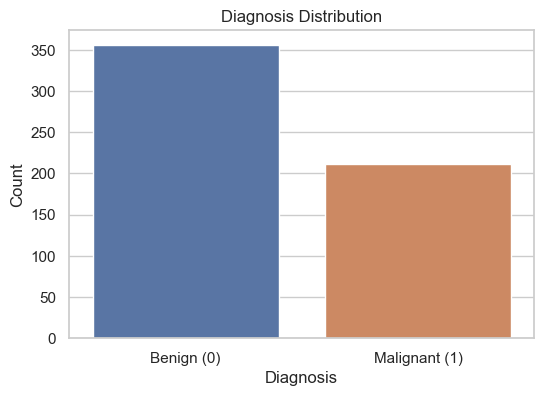

In [23]:
# Visualize the distribution of diagnosis classes (Benign vs Malignant)
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

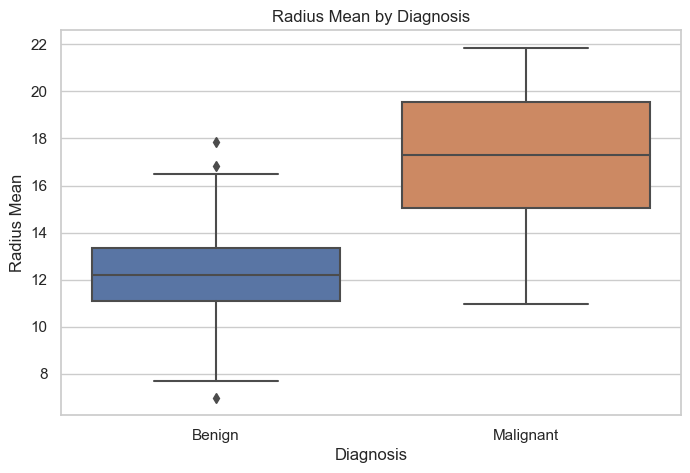

In [24]:
# Boxplot to compare the distribution of radius_mean between Benign and Malignant tumors
plt.figure(figsize=(8, 5))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Radius Mean by Diagnosis')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

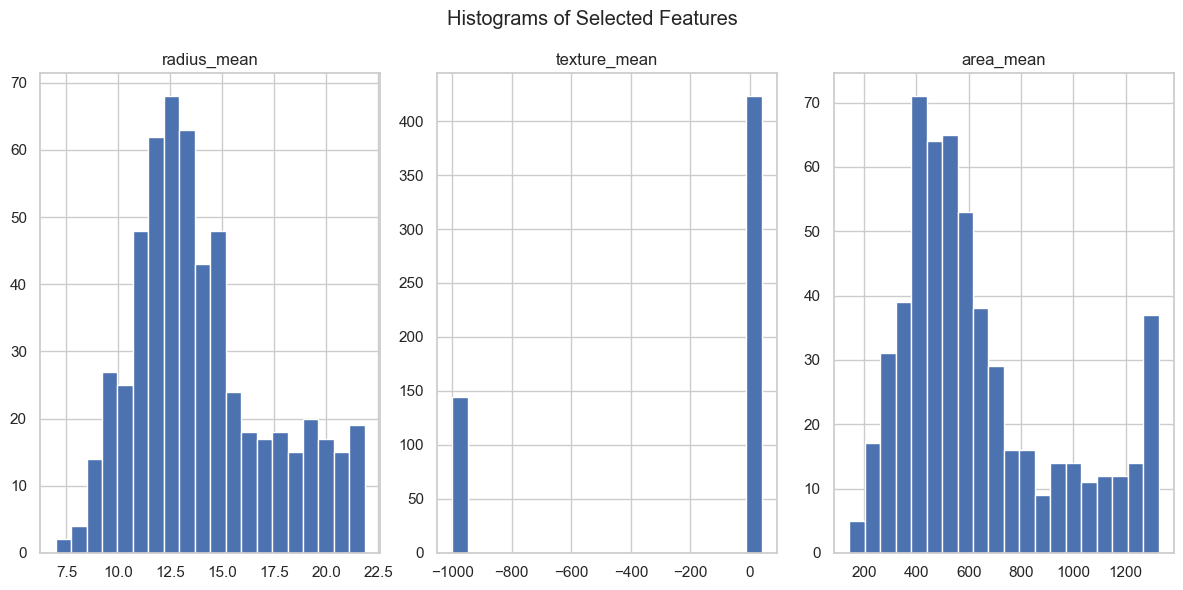

In [25]:
# Histograms to visualize the distribution of key features
key_features = ['radius_mean', 'texture_mean', 'area_mean']
df[key_features].hist(bins=20, figsize=(12, 6), layout=(1, 3))
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

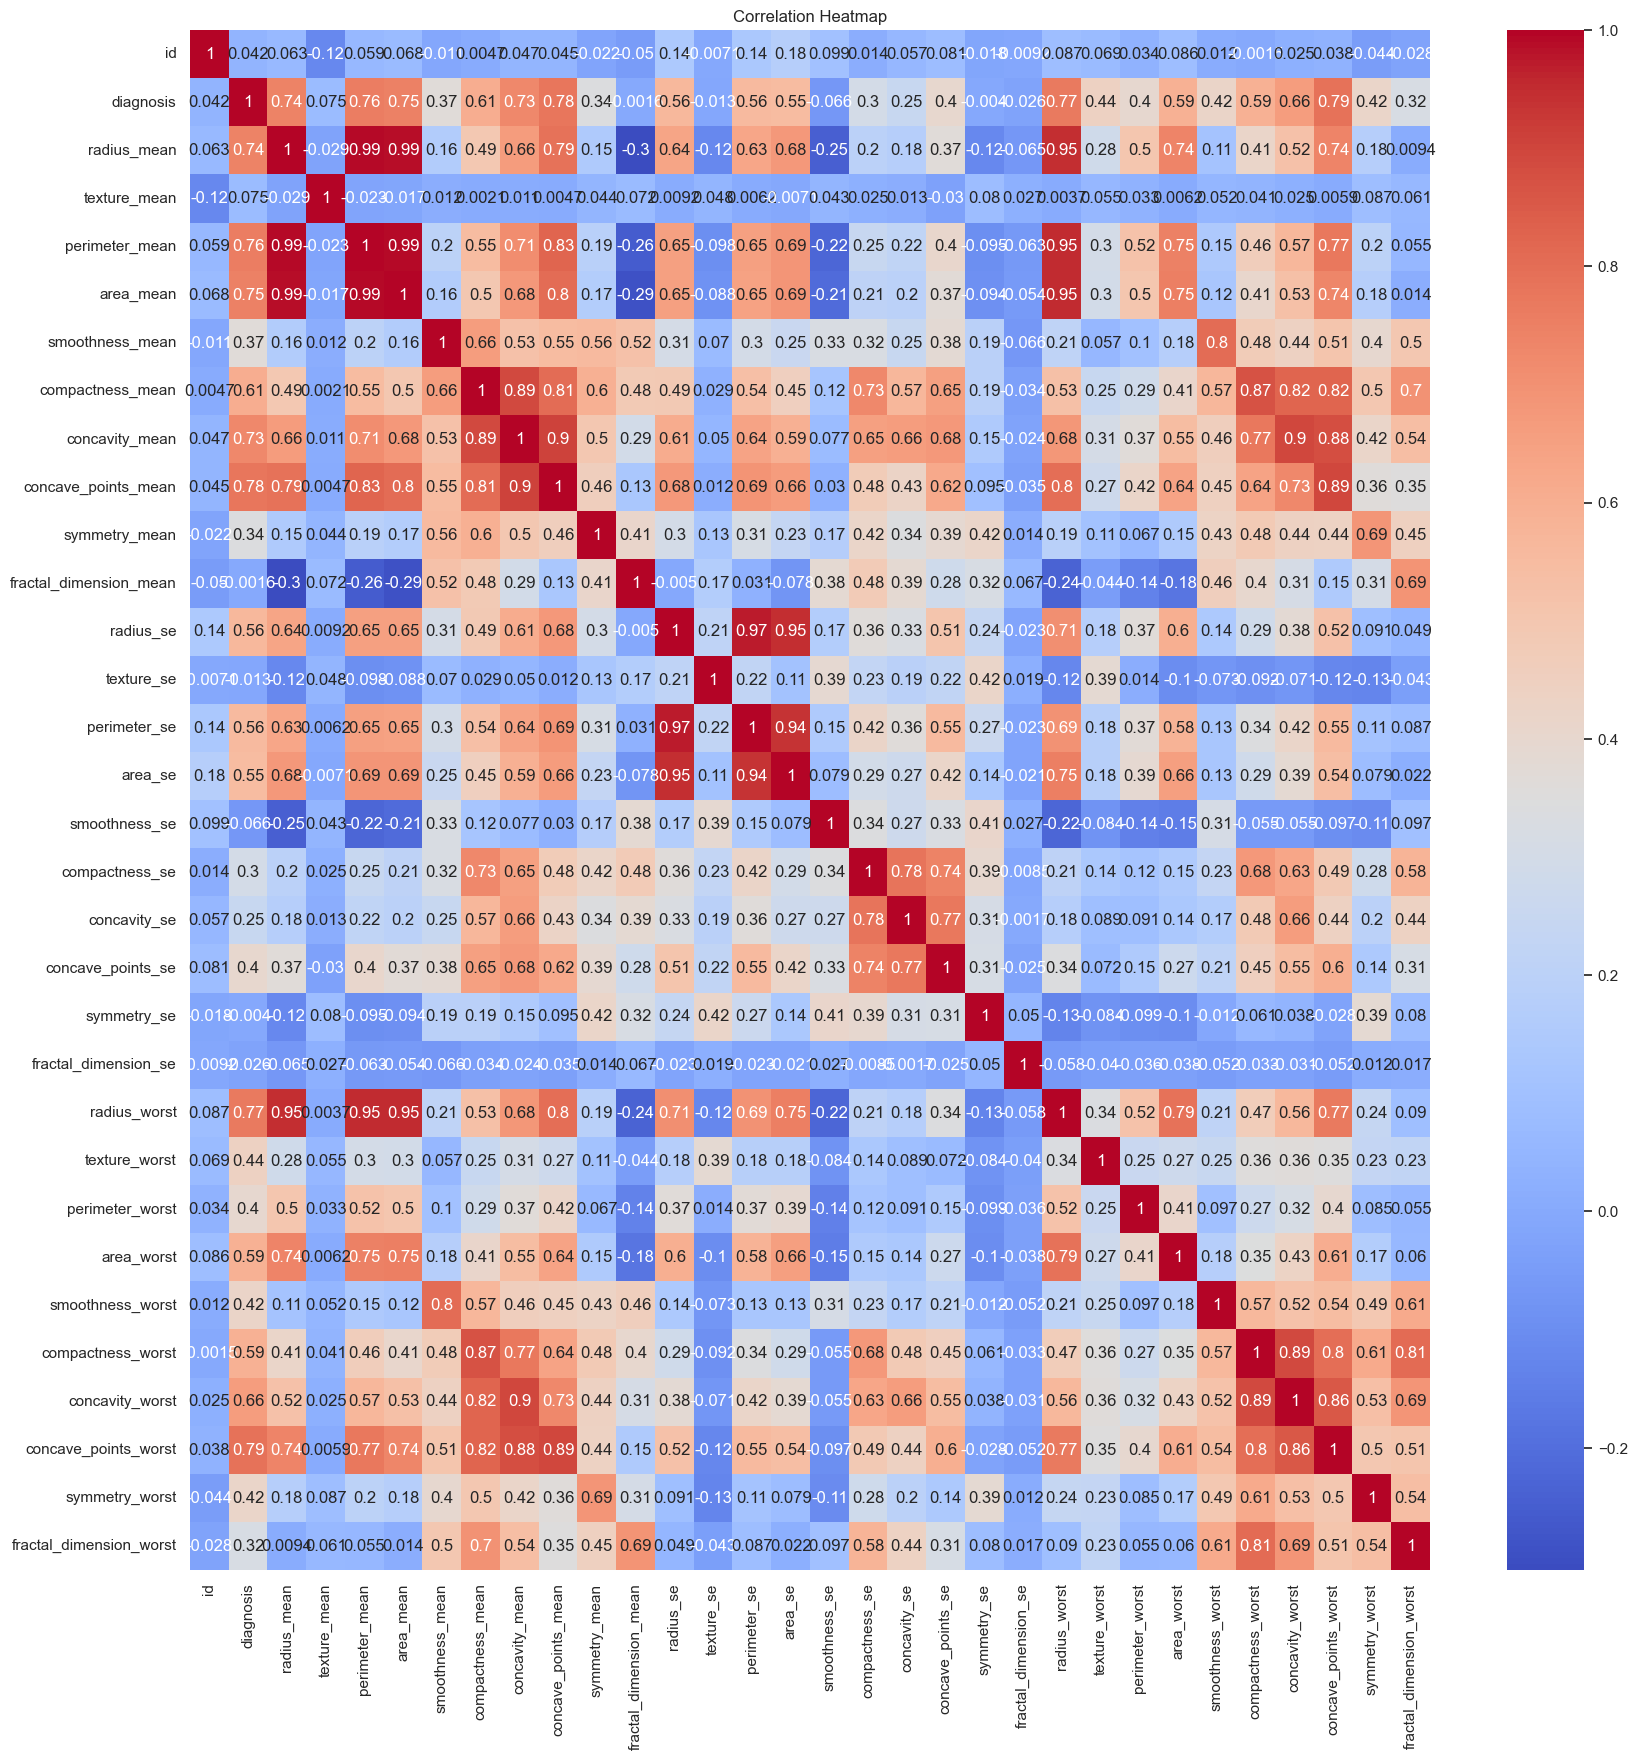

In [26]:
# Correlation heatmap to identify linear relationships between numerical features
plt.figure(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [27]:
# Find strong correlations (above 0.9, excluding self-correlation)
threshold = 0.9
strong_corr = corr.abs().unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr < 1]  # remove self-correlation
strong_corr = strong_corr[strong_corr >= threshold]

print(strong_corr)

perimeter_mean       radius_mean            0.991152
radius_mean          perimeter_mean         0.991152
perimeter_mean       area_mean              0.990313
area_mean            perimeter_mean         0.990313
                     radius_mean            0.987121
radius_mean          area_mean              0.987121
perimeter_se         radius_se              0.971145
radius_se            perimeter_se           0.971145
perimeter_mean       radius_worst           0.954041
radius_worst         perimeter_mean         0.954041
                     area_mean              0.952570
area_mean            radius_worst           0.952570
radius_worst         radius_mean            0.948817
radius_mean          radius_worst           0.948817
area_se              radius_se              0.948534
radius_se            area_se                0.948534
perimeter_se         area_se                0.936735
area_se              perimeter_se           0.936735
concavity_mean       concave_points_mean    0.

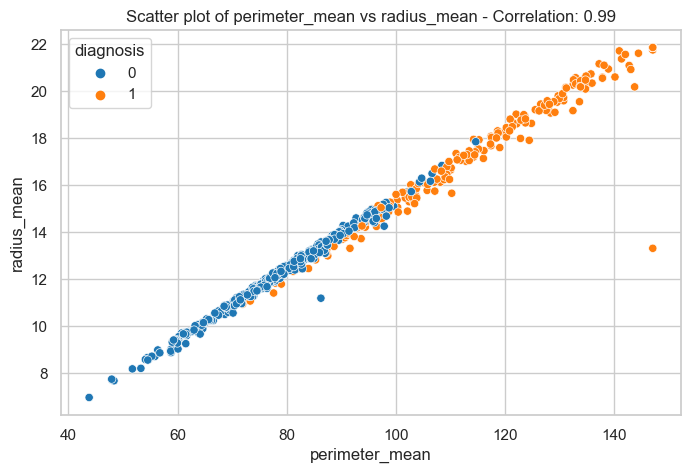

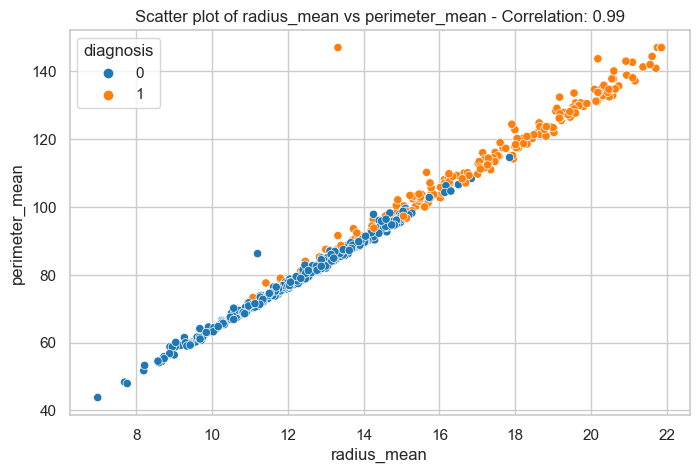

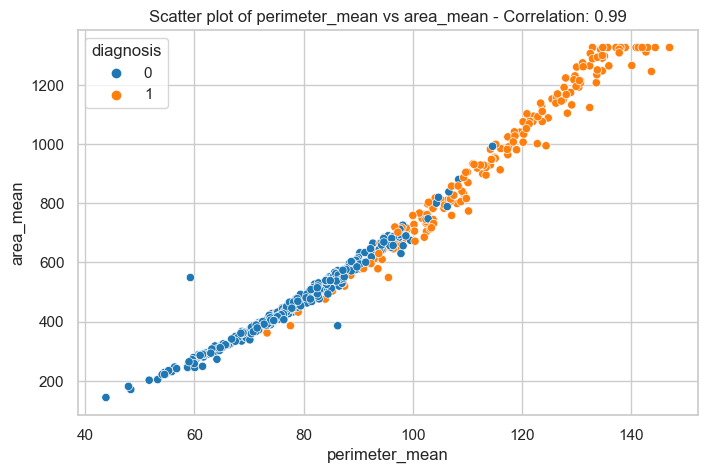

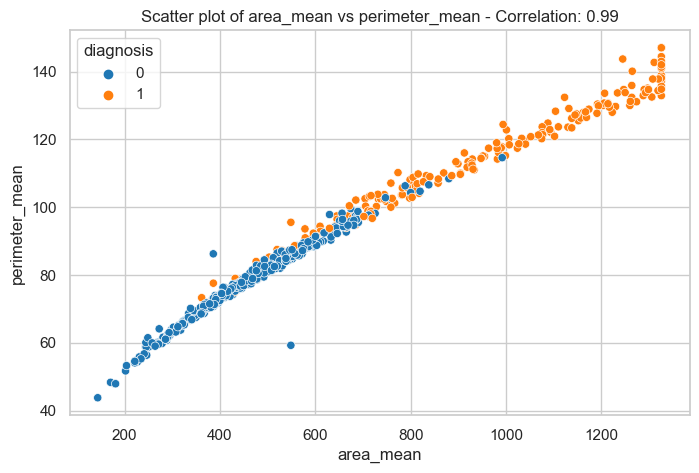

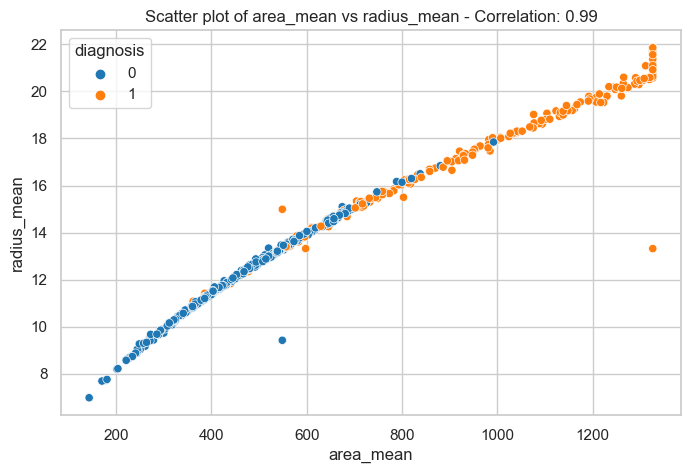

In [28]:
N = 5 # number of pairs to plot
for (feature1, feature2), corr_value in strong_corr.head(N).items():
    plt.figure(figsize=(8, 5))
    custom_palette = ['red', 'green', 'blue', 'yellow', 'purple']
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='diagnosis', palette='tab10')
    plt.title(f'Scatter plot of {feature1} vs {feature2} - Correlation: {corr_value:.2f}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

In [29]:
# Dropping the 'id' column as it's not useful for prediction
dataset_model = df.drop(columns='id')

In [30]:
# Separating features and target variable
X = dataset_model.drop(columns='diagnosis')
y = dataset_model['diagnosis']

In [31]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Data Splitting: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# Shapes of the split datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((453, 30), (114, 30), (453,), (114,))

In [34]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2) # Reducing to 2 dimensions for visualization purposes
X_pca = pca.fit_transform(X_train)

In [35]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

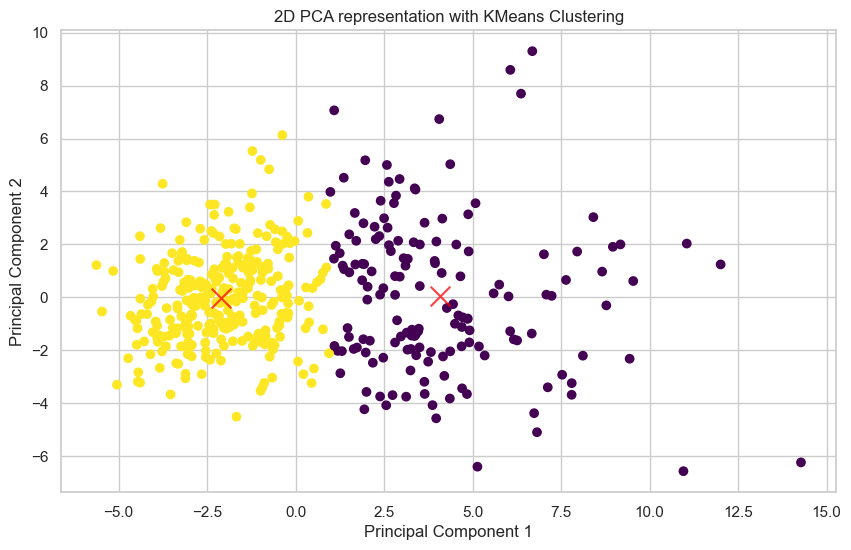

In [36]:
# Visualization of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('2D PCA representation with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [37]:
# Variance explained by the PCA components
variance_explained = np.sum(pca.explained_variance_ratio_)

variance_explained

0.5557506374514443

In [38]:
# Calculate the silhouette and Davies-Bouldin scores
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin = davies_bouldin_score(X_pca, labels)

# Print the scores
(silhouette_avg, davies_bouldin)

(0.504606808136522, 0.8396167604617589)

In [39]:
# Initializing models
log_reg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [40]:
# Training the models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Making predictions on the test set
log_reg_pred = log_reg.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)

In [42]:
# Evaluation Metrics
def evaluate_model(name, true_values, predictions):
    accuracy = accuracy_score(true_values, predictions)
    precision = precision_score(true_values, predictions)
    recall = recall_score(true_values, predictions)
    f1 = f1_score(true_values, predictions)
    return {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [43]:
# Evaluating each model
log_reg_eval = evaluate_model('Logistic Regression', y_test, log_reg_pred)
svm_eval = evaluate_model('SVM', y_test, svm_pred)
rf_eval = evaluate_model('Random Forest', y_test, rf_pred)

In [44]:
# Compiling the evaluations
model_evaluations = pd.DataFrame([log_reg_eval, svm_eval, rf_eval])
model_evaluations

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.964912,0.931818,0.976190,0.953488
1,SVM,0.964912,0.952381,0.952381,0.952381
2,Random Forest,0.956140,0.951220,0.928571,0.939759


In [45]:
# Getting feature importances
feature_importances = rf.feature_importances_

In [46]:
# Creating a DataFrame for visualization
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [47]:
# Sorting the features by importance
features_sorted = features.sort_values(by='Importance', ascending=False)

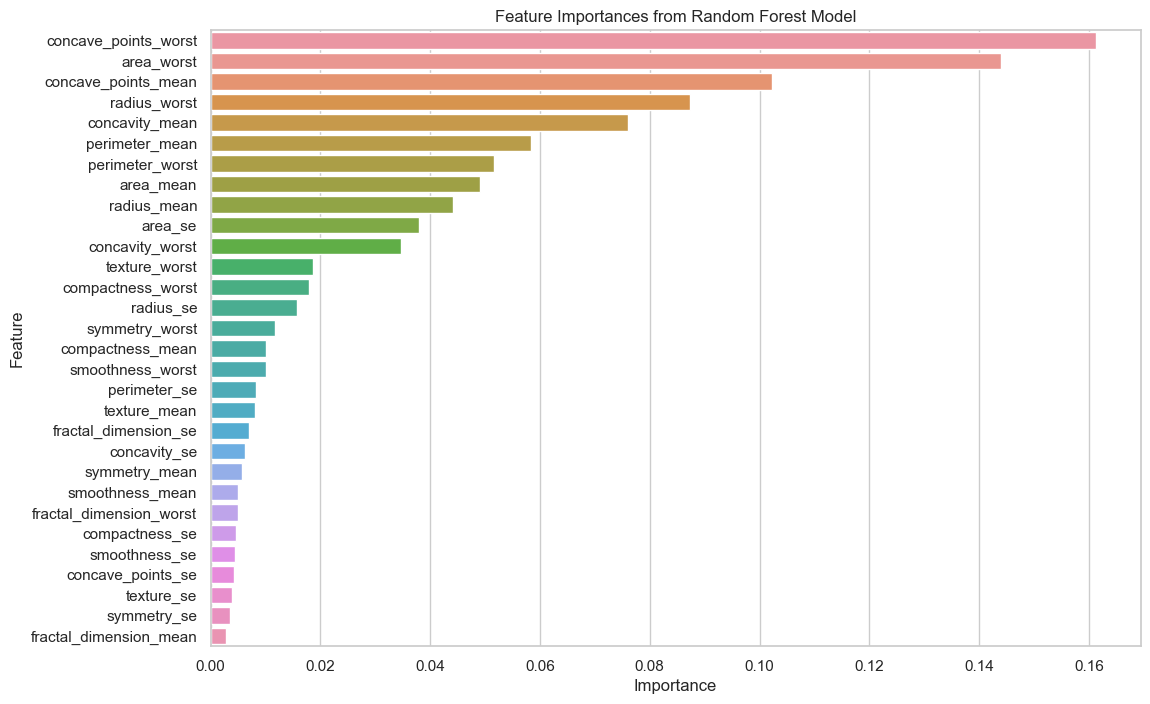

In [48]:
# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_sorted)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()